# Two-way Fixed Effects

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import gpboost as gpb
from patsy import dmatrix

In [10]:
path = '../../../../../data/processed/df_filtered.xlsx'
df = pd.read_excel(path)
df.dropna(subset=('island_ids', 'years', 'populations', 'after_treated'), inplace=True)
df.head()

,island_ids,years,region_codes,prefecture_codes,populations,treatment_group,treatment_group_mainland,year_bridges_opened,after_treated,year_connect_mainland,...,income,area_km2,distance_m,elementary_school,junior_high_school,high_school,hospital,population_change_rate,control_group,time_since_intervention
5,67,1995,32202,32,426.0,1,1,1999,0,1999,...,60360604.0,0.28,615.0,NaN,NaN,NaN,NaN,NaN,0,-4
6,67,2000,32202,32,324.0,1,1,1999,1,1999,...,60174079.0,0.28,615.0,NaN,NaN,NaN,NaN,-23.943662,0,1
7,67,2005,32202,32,302.0,1,1,1999,1,1999,...,52489632.0,0.28,615.0,NaN,NaN,NaN,NaN,-6.790123,0,6
8,67,2010,32202,32,265.0,1,1,1999,1,1999,...,63971519.0,0.28,615.0,NaN,NaN,NaN,NaN,-12.251656,0,11
9,67,2015,32202,32,197.0,1,1,1999,1,1999,...,63466038.0,0.28,615.0,NaN,NaN,NaN,NaN,-25.660377,0,16


In [20]:
y = df['populations']
X = dmatrix('C(island_ids) + C(years) + after_treated -1', df, return_type='dataframe')

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

residuals = results.resid

                            OLS Regression Results                            
Dep. Variable:            populations   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     295.8
Date:                Fri, 08 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:47:34   Log-Likelihood:                -14123.
No. Observations:                1697   AIC:                         2.849e+04
Df Residuals:                    1573   BIC:                         2.917e+04
Df Model:                         123                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(island_ids)[67]   2.171e+04   1160

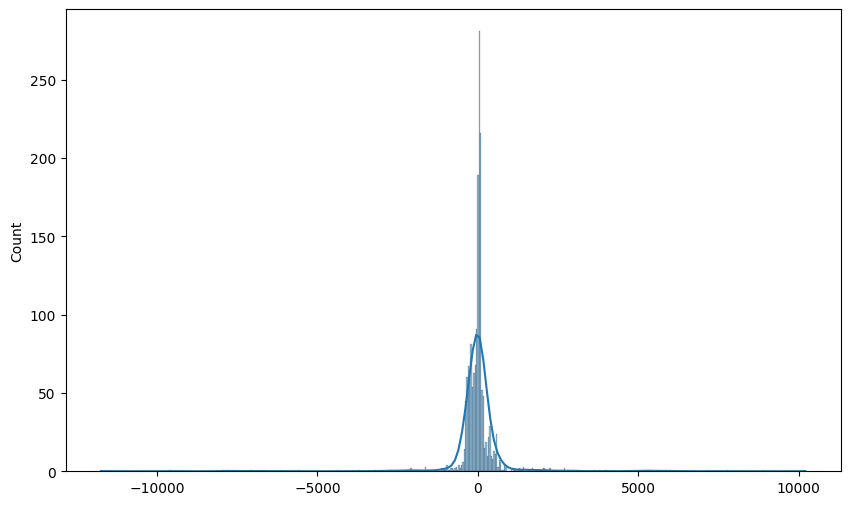

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True);